In [36]:
import matplotlib.pyplot as plt
import random
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten
from keras.optimizers import Adam,SGD
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

In [10]:
#get the data
import pickle
import pandas as pd
with open('german-traffic-signs/train.p','rb') as f:
    train_data = pickle.load(f)
with open('german-traffic-signs/valid.p','rb') as f:
    val_data = pickle.load(f)
with open('german-traffic-signs/test.p','rb') as f:
    test_data = pickle.load(f)
signnames = pd.read_csv('german-traffic-signs/signnames.csv')

In [11]:
train_data['features'].shape

(34799, 32, 32, 3)

In [12]:
train_data['labels'].shape

(34799,)

In [13]:
test_data['features'].shape

(12630, 32, 32, 3)

In [14]:
test_data['labels'].shape

(12630,)

In [15]:
xtrain,ytrain = train_data['features'],train_data['labels']
xval,yval = val_data['features'],val_data['labels']
xtest,ytest = test_data['features'],test_data['labels']

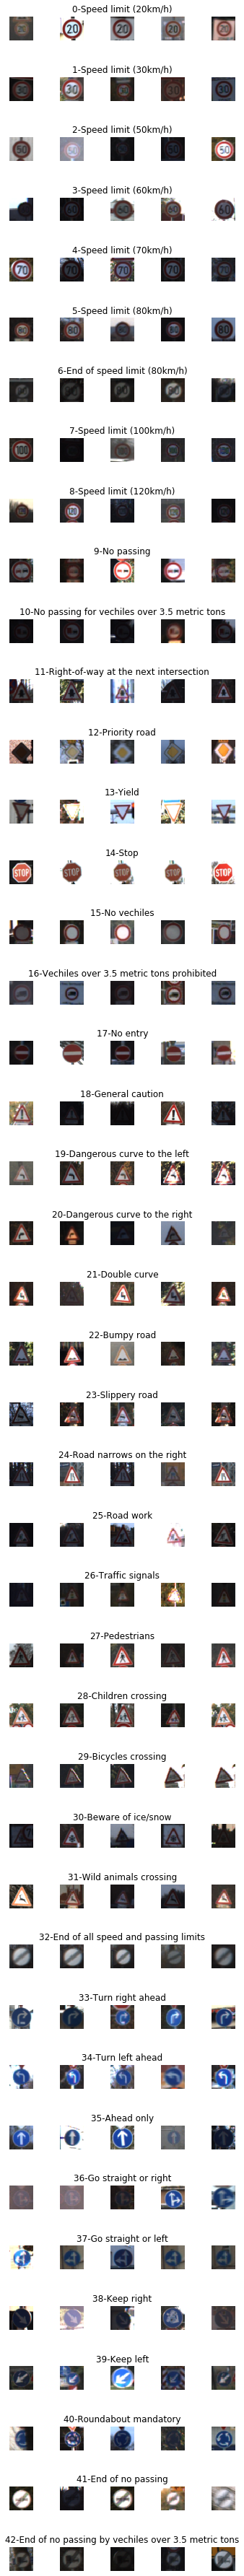

In [16]:
# random show images
num_of_samples = []
fig, ax = plt.subplots(43,5,figsize=(5,50))
fig.tight_layout()
for i in range(5):
    for j, row in signnames.iterrows():
        x_selected = xtrain[ytrain==j]
        ax[j][i].imshow(x_selected[random.randint(0,len(x_selected)-1)])
        ax[j][i].axis('off')
        if i == 2:
            ax[j][i].set_title(str(j) + '-' + row['SignName'])
            num_of_samples.append(len(x_selected))

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


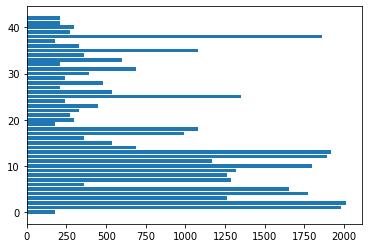

In [17]:
# check how many images for each class.
plt.barh(range(0,43),num_of_samples)
print(num_of_samples)

In [18]:
#one label encoding
ytrain = to_categorical(ytrain,43)
ytest = to_categorical(ytest,43)
yval = to_categorical(yval,43)

In [19]:
#normalize data
xtrain = xtrain/255
xtest = xtest/255
xval = xval/255

In [159]:
def CNN():
    model = Sequential()
    model.add(Conv2D(30,(5,5),input_shape=(32,32,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(30,(5,5),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(150,activation='relu'))
    model.add(Dense(43,activation='softmax'))
    
    model.compile(optimizer = Adam(lr=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

    return model

In [160]:
model = CNN()
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 28, 28, 30)        2280      
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 14, 14, 30)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 10, 10, 30)        22530     
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 5, 5, 30)          0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 750)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 150)               112650    
_________________________________________________________________
dense_33 (Dense)             (None, 43)              

In [161]:
model.fit(xtrain,ytrain,epochs=20,batch_size=400,validation_data=(xval,yval))

Train on 34799 samples, validate on 4410 samples
Epoch 1/20
34799/34799 [==============================] - 27s 774us/step - loss: 3.5217 - accuracy: 0.1092 - val_loss: 3.4512 - val_accuracy: 0.1998
Epoch 2/20
34799/34799 [==============================] - 27s 775us/step - loss: 3.0739 - accuracy: 0.2901 - val_loss: 2.9474 - val_accuracy: 0.3467
Epoch 3/20
34799/34799 [==============================] - 26s 758us/step - loss: 2.4870 - accuracy: 0.4184 - val_loss: 2.4239 - val_accuracy: 0.4376
Epoch 4/20
34799/34799 [==============================] - 25s 729us/step - loss: 1.9493 - accuracy: 0.5425 - val_loss: 1.9755 - val_accuracy: 0.5478
Epoch 5/20
34799/34799 [==============================] - 26s 755us/step - loss: 1.5489 - accuracy: 0.6304 - val_loss: 1.6748 - val_accuracy: 0.5989
Epoch 6/20
34799/34799 [==============================] - 27s 769us/step - loss: 1.2703 - accuracy: 0.7013 - val_loss: 1.4336 - val_accuracy: 0.6735
Epoch 7/20
34799/34799 [==============================] -

12630/12630 [==============================] - 4s 302us/step
[0.9366226355612325, 0.8166270852088928]


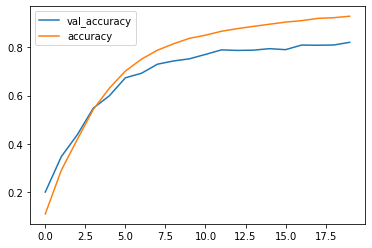

In [165]:
# the model is overfitting
print(model.evaluate(xtest,ytest))
pd.DataFrame(model.history.history)[['val_accuracy','accuracy']].plot()

In [27]:
estop = EarlyStopping(monitor='val_loss',patience=5)

In [163]:
#lets try to add dropout and early stopping to the model
def CNN():
    model = Sequential()
    model.add(Conv2D(30,(5,5),input_shape=(32,32,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(30,(5,5),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(150,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(43,activation='softmax'))
    
    model.compile(optimizer = Adam(lr=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
    return model

new_model = CNN()
new_model.fit(xtrain,ytrain,epochs=20,batch_size=400,validation_data=(xval,yval),callbacks=[estop])

Train on 34799 samples, validate on 4410 samples
Epoch 1/20
34799/34799 [==============================] - 27s 785us/step - loss: 3.6018 - accuracy: 0.0678 - val_loss: 3.4752 - val_accuracy: 0.1796
Epoch 2/20
34799/34799 [==============================] - 27s 775us/step - loss: 3.2773 - accuracy: 0.1819 - val_loss: 3.0534 - val_accuracy: 0.2868
Epoch 3/20
34799/34799 [==============================] - 27s 775us/step - loss: 2.8401 - accuracy: 0.2955 - val_loss: 2.6506 - val_accuracy: 0.4095
Epoch 4/20
34799/34799 [==============================] - 26s 761us/step - loss: 2.4682 - accuracy: 0.3876 - val_loss: 2.3030 - val_accuracy: 0.4671
Epoch 5/20
34799/34799 [==============================] - 27s 779us/step - loss: 2.1488 - accuracy: 0.4526 - val_loss: 1.9936 - val_accuracy: 0.5045
Epoch 6/20
34799/34799 [==============================] - 28s 792us/step - loss: 1.8839 - accuracy: 0.5031 - val_loss: 1.7386 - val_accuracy: 0.5417
Epoch 7/20
34799/34799 [==============================] -

12630/12630 [==============================] - 4s 309us/step
[0.637953383848956, 0.8403008580207825]


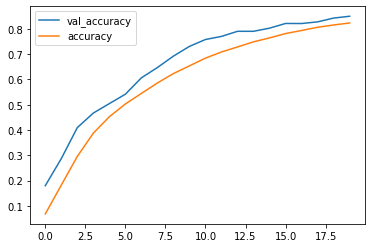

In [167]:
#now the model is underfitting
print(new_model.evaluate(xtest,ytest))
pd.DataFrame(new_model.history.history)[['val_accuracy','accuracy']].plot()

In [193]:
# this time try with leaky relu for the model
# incease epochs and batch size
# add more conv2D layer
# incease number of hidden neurals

def CNN():
    model = Sequential()
    model.add(Conv2D(30,(5,5),input_shape=(32,32,3),activation='relu'))
    model.add(Conv2D(30,(5,5),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(30,(5,5),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(250,activation='elu'))
    model.add(Dropout(0.5))
    model.add(Dense(43,activation='softmax'))
    
    model.compile(optimizer = Adam(lr=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
    return model

model_2 = CNN()
model_2.fit(xtrain,ytrain,epochs=100,batch_size=1024,validation_data=(xval,yval),callbacks=[estop])

Train on 34799 samples, validate on 4410 samples
Epoch 1/100
34799/34799 [==============================] - 47s 1ms/step - loss: 3.6836 - accuracy: 0.0475 - val_loss: 3.5677 - val_accuracy: 0.0771
Epoch 2/100
34799/34799 [==============================] - 52s 2ms/step - loss: 3.5076 - accuracy: 0.0862 - val_loss: 3.4025 - val_accuracy: 0.1921
Epoch 3/100
34799/34799 [==============================] - 51s 1ms/step - loss: 3.2803 - accuracy: 0.1681 - val_loss: 3.0982 - val_accuracy: 0.2472
Epoch 4/100
34799/34799 [==============================] - 52s 1ms/step - loss: 2.9769 - accuracy: 0.2562 - val_loss: 2.7208 - val_accuracy: 0.3605
Epoch 5/100
34799/34799 [==============================] - 50s 1ms/step - loss: 2.6349 - accuracy: 0.3393 - val_loss: 2.3491 - val_accuracy: 0.4392
Epoch 6/100
34799/34799 [==============================] - 50s 1ms/step - loss: 2.3241 - accuracy: 0.4027 - val_loss: 2.0204 - val_accuracy: 0.4866
Epoch 7/100
34799/34799 [==============================] - 50s 

12630/12630 [==============================] - 4s 301us/step


[0.46128849537714267, 0.8996832966804504]

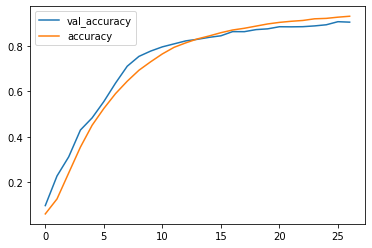

In [194]:
# now the accuracy is much better for test data 
# lets have a look the accuracy curve and loss curve
pd.DataFrame(model_s.history.history)[['val_accuracy','accuracy']].plot()
model_s.evaluate(xtest,ytest)

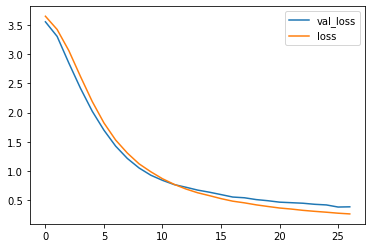

In [195]:
pd.DataFrame(model_s.history.history)[['val_loss','loss']].plot()

(1267, 32, 32, 3)
percentage of misclassified images: 3.64 %


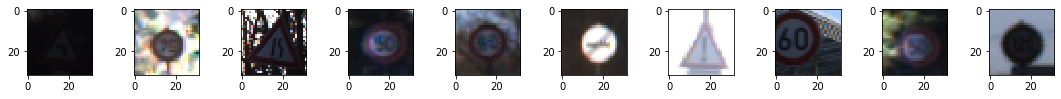

In [208]:
#check 10 misclassified images and how many of them
prediction = model_s.predict_classes(xtest)
misclassified = test_data['features'][prediction != test_data['labels']]
print(misclassified.shape)
# 1267 images are misclassified
percent = misclassified.shape[0]/train_data['features'].shape[0]
print('percentage of misclassified images: {:.2f} %'.format(percent*100))
fig,ax = plt.subplots(1,10,figsize=(15,5)) 
fig.tight_layout()
for i in range(10):
    ax[i].imshow(misclassified[random.randint(0,len(misclassified)-1)])

In [198]:
# use image augmentation to generate more images for training
from keras.preprocessing.image import ImageDataGenerator
generator = ImageDataGenerator(width_shift_range=0.1,
                              height_shift_range=0.1,
                              zoom_range=0.1,
                              shear_range=0.1,
                              rotation_range=15.)
generator.fit(xtrain)

In [206]:
# lets train again
gene_model = CNN()
gene_model.fit_generator(generator.flow(xtrain,ytrain,batch_size=16),
                       steps_per_epoch=len(xtrain)/50,
                       epochs=100,
                       validation_data=(xtest,ytest),shuffle=True,callbacks=[estop])

Epoch 1/100
696/695 [==============================] - 33s 47ms/step - loss: 3.4493 - accuracy: 0.0929 - val_loss: 2.9493 - val_accuracy: 0.2594
Epoch 2/100
696/695 [==============================] - 32s 46ms/step - loss: 2.9085 - accuracy: 0.2167 - val_loss: 2.3845 - val_accuracy: 0.3743
Epoch 3/100
696/695 [==============================] - 31s 44ms/step - loss: 2.5135 - accuracy: 0.3021 - val_loss: 1.9978 - val_accuracy: 0.4290
Epoch 4/100
696/695 [==============================] - 31s 45ms/step - loss: 2.2390 - accuracy: 0.3579 - val_loss: 1.6955 - val_accuracy: 0.4851
Epoch 5/100
696/695 [==============================] - 31s 44ms/step - loss: 2.0094 - accuracy: 0.4018 - val_loss: 1.4638 - val_accuracy: 0.5420
Epoch 6/100
696/695 [==============================] - 32s 46ms/step - loss: 1.8291 - accuracy: 0.4461 - val_loss: 1.3073 - val_accuracy: 0.5804
Epoch 7/100
696/695 [==============================] - 32s 46ms/step - loss: 1.6832 - accuracy: 0.4807 - val_loss: 1.1543 - val_ac

In [43]:
# create evaluate function
def evaluate(model,loss=True):
    eva = model.evaluate(xtest,ytest)
    print('Test score: {:.3f}'.format(eva[0]))
    print('Test accuracy: {:.3f}'.format(eva[1]))
    if loss == True:
        pd.DataFrame(model.history.history)[['val_loss','loss']].plot()
    else:
        pd.DataFrame(model.history.history)[['val_accuracy','accuracy']].plot()

12630/12630 [==============================] - 4s 325us/step
Test score: 0.294
Test accuracy: 0.917


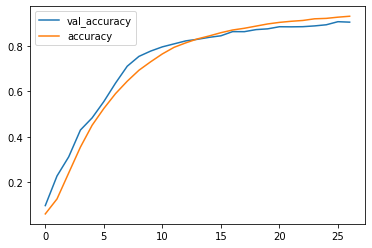

In [211]:
# accuracy increased 
evaluate(gene_model,False)

In [215]:
# lets make a prediction
pred = gene_model.predict_classes(xtest)
incorrect = test_data['features'][pred != test_data['labels']]
print(incorrect.shape)
# 1046 images are misclassified
percent = incorrect.shape[0]/train_data['features'].shape[0]
print('percentage of misclassified images: {:.2f} %'.format(percent*100))

(1046, 32, 32, 3)
percentage of misclassified images: 3.01 %


In [22]:
# image improvement 
# Cutout - randomly cutout part of image
# AddHueAndSaturation change the image brightness and stauration for range(-50,50)
import imgaug as ia
from imgaug import augmenters as iaa

In [30]:
from keras.preprocessing.image import ImageDataGenerator
generator = ImageDataGenerator(width_shift_range=0.1,
                              height_shift_range=0.1,
                              zoom_range=0.1,
                              shear_range=0.1,
                              rotation_range=15.)
generator.fit(xtrain)

In [34]:
cutout = iaa.Cutout(nb_iterations=2)
hue_sat = iaa.AddToHueAndSaturation((-50,50))
def my_generator():
    batches = generator.flow(xtrain,ytrain,batch_size=50)
    
    while True:
        xbatch,ybatch = next(batches)
        for i in range(len(xbatch)):
            if np.random.rand() < 0.5:
                xbatch[i] = xbatch[i] * 255
                xbatch[i] = cutout(image=xbatch[i].astype(np.uint8))/255
            if np.random.rand() < 0.5:
                xbatch[i] = xbatch[i] * 255
                xbatch[i] = hue_sat(image=xbatch[i].astype(np.uint8))/255
        yield(xbatch,ybatch)

In [37]:
# train again
def CNN():
    model = Sequential()
    model.add(Conv2D(30,(5,5),input_shape=(32,32,3),activation='relu'))
    model.add(Conv2D(30,(5,5),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(30,(5,5),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(250,activation='elu'))
    model.add(Dropout(0.5))
    model.add(Dense(43,activation='softmax'))
    
    model.compile(optimizer = Adam(lr=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
    return model

model_3 = CNN()
model_3.fit_generator(my_generator(),
                     steps_per_epoch=len(xtrain)/50,
                       epochs=100,
                       validation_data=(xtest,ytest),shuffle=True,callbacks=[estop])

Epoch 1/100
696/695 [==============================] - 141s 203ms/step - loss: 3.2771 - accuracy: 0.1435 - val_loss: 2.5328 - val_accuracy: 0.3705
Epoch 2/100
696/695 [==============================] - 139s 200ms/step - loss: 2.5891 - accuracy: 0.2895 - val_loss: 1.7897 - val_accuracy: 0.4952
Epoch 3/100
696/695 [==============================] - 140s 201ms/step - loss: 2.1741 - accuracy: 0.3748 - val_loss: 1.4275 - val_accuracy: 0.5629
Epoch 4/100
696/695 [==============================] - 140s 201ms/step - loss: 1.9254 - accuracy: 0.4305 - val_loss: 1.2031 - val_accuracy: 0.6370
Epoch 5/100
696/695 [==============================] - 141s 202ms/step - loss: 1.7328 - accuracy: 0.4728 - val_loss: 1.0321 - val_accuracy: 0.6928
Epoch 6/100
696/695 [==============================] - 140s 201ms/step - loss: 1.5647 - accuracy: 0.5199 - val_loss: 0.8975 - val_accuracy: 0.7430
Epoch 7/100
696/695 [==============================] - 140s 201ms/step - loss: 1.4439 - accuracy: 0.5531 - val_loss: 0

12630/12630 [==============================] - 4s 289us/step
Test score: 0.104
Test accuracy: 0.968


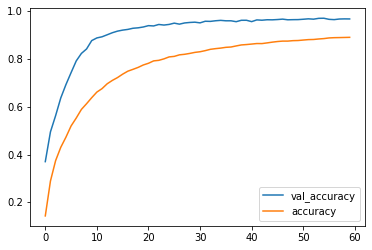

In [44]:
# BAM!
evaluate(model_3,False)

12630/12630 [==============================] - 4s 281us/step
Test score: 0.104
Test accuracy: 0.968


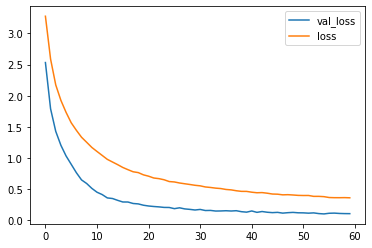

In [45]:
evaluate(model_3)